Install Packages/Libraries

In [26]:
%pip install streamlit pandas plotly

Note: you may need to restart the kernel to use updated packages.


Import Packages/Libraries

In [27]:
import os
import io
import pandas as pd
import matplotlib.pyplot as plt
from supabase import create_client, Client

Configurations

In [28]:
SUPABASE_URL: str = "SUPABASE_URL"
SUPABASE_KEY: str = "SUPABASE_KEY"
supabase: Client = create_client(SUPABASE_URL, SUPABASE_KEY)
BUCKET_NAME = "typescriptmate"
COMPLETIONS_FILE_PATH = "completions.csv"
FEEDBACKS_FILE_PATH = "feedbacks.csv"

Load Completions Data

In [29]:
file_bytes = supabase.storage.from_(BUCKET_NAME).download(COMPLETIONS_FILE_PATH)

csv_bytes = io.BytesIO(file_bytes)

df = pd.read_csv(csv_bytes)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

Bar chart: Latency over Time

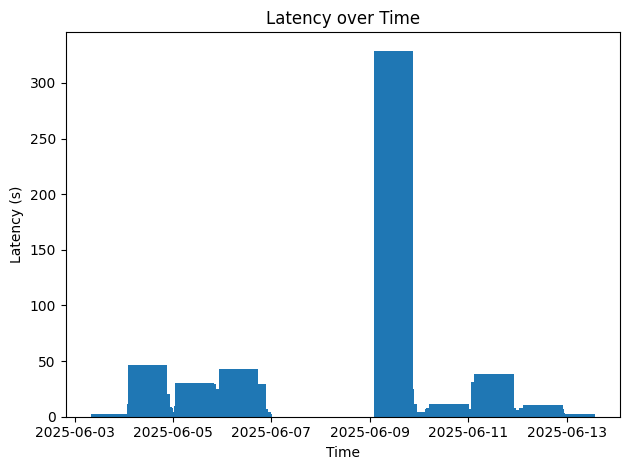

In [30]:
plt.figure()
plt.bar(df['datetime'], df['latency_s'])
plt.xlabel('Time')
plt.ylabel('Latency (s)')
plt.title('Latency over Time')
plt.tight_layout()
plt.show()

Scatter plot: Latency vs. Time

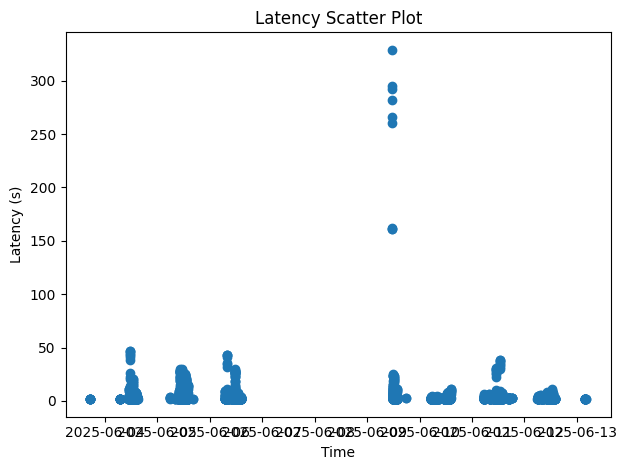

In [31]:
plt.figure()
plt.scatter(df['datetime'], df['latency_s'])
plt.xlabel('Time')
plt.ylabel('Latency (s)')
plt.title('Latency Scatter Plot')
plt.tight_layout()
plt.show()

Pie chart: Completion Availability

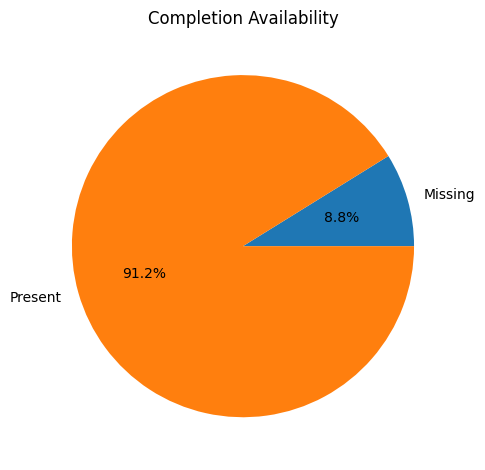

In [32]:
# Flag entries where completion is missing (empty string or NaN)
df['missing'] = df['completion'].fillna('').astype(str) == ''
counts = df['missing'].value_counts()
labels = ['Missing', 'Present']
sizes  = [counts.get(True, 0), counts.get(False, 0)]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Completion Availability')
plt.tight_layout()
plt.show()

Load Feedbacks Data

In [33]:
file_bytes = supabase.storage.from_(BUCKET_NAME).download(FEEDBACKS_FILE_PATH)

csv_bytes = io.BytesIO(file_bytes)

df = pd.read_csv(csv_bytes)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
df['time'] = pd.to_numeric(df['time'], errors='coerce')

Histogram: Distribution of Response Times

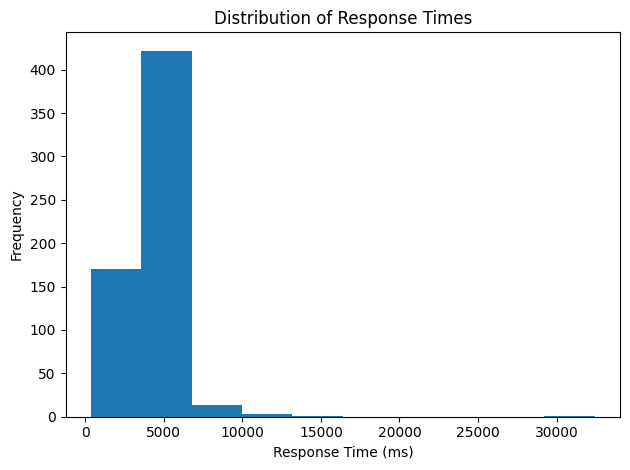

In [34]:
plt.figure()
plt.hist(df['time'].dropna(), bins=10)
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.title('Distribution of Response Times')
plt.tight_layout()
plt.show()

Pie Chart: Acceptance Rate

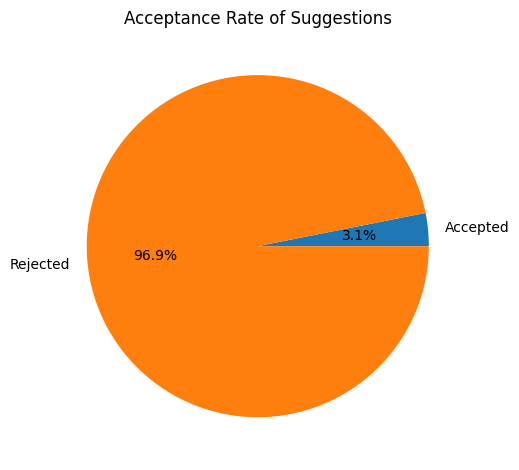

In [35]:
# parse accepted as boolean
df['accepted'] = df['accepted'].astype(bool)
accepted_counts = df['accepted'].value_counts()
labels = ['Accepted', 'Rejected']
sizes  = [accepted_counts.get(True, 0), accepted_counts.get(False, 0)]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Acceptance Rate of Suggestions')
plt.tight_layout()
plt.show()

Bar Chart: Response Time per Event

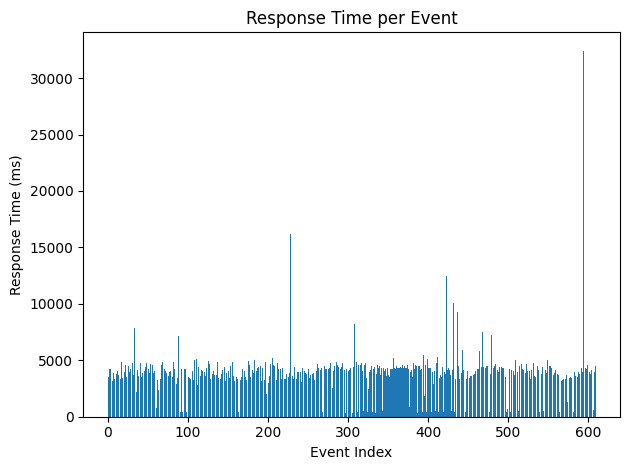

In [36]:
plt.figure()
plt.bar(df.index, df['time'])
plt.xlabel('Event Index')
plt.ylabel('Response Time (ms)')
plt.title('Response Time per Event')
plt.tight_layout()
plt.show()

Scatter Plot: Latency vs. Prefix Percentage

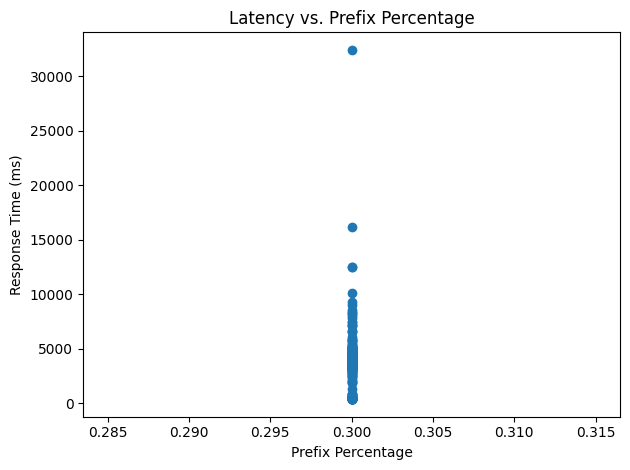

In [37]:
# prefixPercentage should be numeric between 0 and 1
df['prefixPercentage'] = pd.to_numeric(df['prefixPercentage'], errors='coerce')
plt.figure()
plt.scatter(df['prefixPercentage'], df['time'])
plt.xlabel('Prefix Percentage')
plt.ylabel('Response Time (ms)')
plt.title('Latency vs. Prefix Percentage')
plt.tight_layout()
plt.show()